# Faster R-CNN Inferencing using OpenCV DNN

In [1]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

cv2.__version__

'4.5.1'

In [2]:
from utils_baru import Utils

utils = Utils()

In [3]:
# load label class coco dataset

classesFile = "bisa.json"
with open(classesFile) as json_labels:
    classes = json.load(json_labels)
 
print("number of class :", len(classes))
classes

number of class : 4


{'0': 'Tembok', '1': 'Pintu', '2': 'Meja', '3': 'Kursi'}

In [4]:
# load petrained model (.pb & .pbtxt) faster R-CNN with backbone Resnet 50 on COCO dataset

net = cv2.dnn.readNetFromTensorflow("model/inference_graph_140k/frozen_inference_graph.pb", 
                                    "model/inference_graph_140k/opencv_dnn_140k.pbtxt")
#net = cv2.dnn.readNetFromTensorflow("model/inference_graph_100k/frozen_inference_graph.pb","0")
#cv2.dnn.writeTextGraph('model/frozen_inference_graph.pb', 'model/faster_rcnn_inception_v2_custom_dataset.pbtxt')

In [5]:
# set CUDA as backend & target OpenCV DNN

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

In [6]:
# get output layers
layerOutput = net.getUnconnectedOutLayersNames()
print(layerOutput)

['detection_out_final']


In [22]:
# load image & convert to blob
target_w = 750
target_h = 750
#mean = np.array([0.0,0.0,0.0])
# frame = imutils.resize(frame, width=400)
#(h, w) = frame.shape[:2]


img = cv2.imread("test_gambar/1826.jpg")
img = cv2.resize(img, (target_w,target_h))

blob = cv2.dnn.blobFromImage(img, 1 , (target_w, target_h),swapRB=True, crop=False)


In [23]:
# predict classess & box
net.setInput(blob)
output = net.forward(layerOutput)


Pintu (97.67 %)
(750, 750)
Waktu Deteksi =  0.028922557830810547 detik


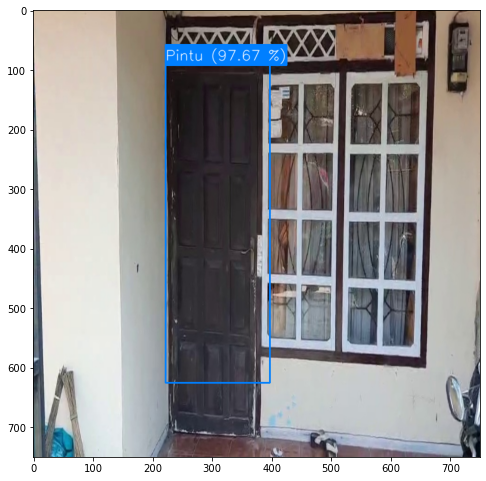

In [24]:
# postprocessing (NMS & draw box)
import time
start_time = time.time()
img = utils.postprocess(output, img , classes, font_size=0.8, confThreshold=70)
print(img.shape[:2])
#IMAGE_SIZE = (8, 17)
# show image
plt.figure(figsize = (8,17))
plt.imshow(img[:,:,::-1])
print("Waktu Deteksi =  %s detik" % (time.time() - start_time))

# Inferencing using Video Stream

- Run script `faster_r-cnn_flask.py` in terminal,
```
python3 faster_r-cnn_flask.py
```